In [1]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx")

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

# dropping null values
print("Before dropping null values:", df.shape)
df.dropna(inplace=True)
print("After dropping null values:", df.shape)

df = df[(df["UnitPrice"]>0) & (df["Quantity"]>0)]
print("After removing negative order:", df.shape)

# Remove timestamp from the date
# df["InvoiceDate"] = df["InvoiceDate"].dt.date

Before dropping null values: (541909, 8)
After dropping null values: (406829, 8)
After removing negative order: (397884, 8)


In [6]:
df["Invoicehour"] = df["InvoiceDate"].dt.hour
df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek
df["isWeekend"] = df["DayOfWeek"].isin([5,6]).astype(int)
df.head()

<ipython-input-6-e791a56c23fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Invoicehour"] = df["InvoiceDate"].dt.hour
<ipython-input-6-e791a56c23fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DayOfWeek"] = df["InvoiceDate"].dt.dayofweek
<ipython-input-6-e791a56c23fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoicehour,DayOfWeek,isWeekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,0


In [7]:
# Check if user places more than one order in a day
hour_check = df.groupby(["CustomerID", df["InvoiceDate"].dt.date])["Invoicehour"].nunique().reset_index()
hour_check["Invoicehour"].value_counts()

,count
Invoicehour,
1,16442
2,288
3,25
4,6
5,1
6,1


In [8]:
# Check if Invoice no has one to one mapping with the customerID
cust_check = df.groupby(["InvoiceNo"])["CustomerID"].nunique().reset_index()
cust_check["CustomerID"].value_counts()

,count
CustomerID,
1,18532


In [9]:
# Bin the hours, (dropped due to high imbalance ~4%)
# df["WorkingHours"] = df["Invoicehour"].apply(lambda row: 1 if (row>=9 and row<=17) else 0)
# df["WorkingHours"].value_counts()

def hour_bin(hr):
  if hr>= 5 and hr<= 10:
    return "Morning"
  elif hr>=11 and hr <= 16:
    return "Afternoon"
  elif hr>=17 and hr<= 21:
    return "Evening"
  else:
    return "Night"
df["InvoicehourBin"] = df["Invoicehour"].apply(hour_bin)
df["InvoicehourBin"].value_counts()

,count
InvoicehourBin,
Afternoon,308751
Morning,69011
Evening,20122


In [10]:
# split data, test set will contain rows from last month
# df["InvoiceDate"].min(), df["InvoiceDate"].max()
df["Year-month"] = pd.to_datetime(df["InvoiceDate"]).dt.to_period('M')

# last two months contribute 20% of the dataset, taking last two months as test data
print(df[(df["Year-month"] == "2011-12") | (df["Year-month"]=="2011-11")]["InvoiceNo"].count()/df["InvoiceNo"].count()*100)
train, test = df[df["Year-month"]<"2011-11"], df[df["Year-month"]>="2011-11"]
train.shape, test.shape, df.shape

20.567552351941774


((316049, 13), (81835, 13), (397884, 13))

In [11]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoicehour,DayOfWeek,isWeekend,InvoicehourBin,Year-month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,0,Morning,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,0,Morning,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,0,Morning,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,0,Morning,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,0,Morning,2010-12


In [14]:
def process(df1):
  # add previous purchase count per customer
  sorted_df = df.sort_values(by=['CustomerID', 'InvoiceDate'])
  # Group and rank: For each customer, count the number of purchases till the previous transaction
  df1['PreviousPurchaseCount'] = df.groupby('CustomerID').cumcount()
  df1["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date

  # find country wise mean unit price, mean quanity bought
  df2 = train.groupby("Country").agg({"Quantity": "mean", "UnitPrice": "mean", "StockCode": "nunique"}).reset_index()
  df2 = df1.merge(df2[["Country", "Quantity", "StockCode"]], on="Country", how="left", suffixes=("_x", "_country_avg"))

  session_data = df2.groupby(["InvoiceDate", "CustomerID", "Invoicehour"]).agg({"Quantity_x": "sum", "UnitPrice": "mean", "StockCode_x": "nunique", "Quantity_country_avg": "mean", "StockCode_country_avg": "mean"}).reset_index()
  session_data["High Purchase"] = (session_data["Quantity_x"] > 10).astype(int)

  # select features
  return session_data.drop(["CustomerID", "InvoiceDate"], axis=1)

train_df, test_df = process(train), process(test)
train_x, train_y = train_df.drop("High Purchase", axis=1), train_df["High Purchase"]
test_x, test_y = test_df.drop("High Purchase", axis=1), test_df["High Purchase"]

<ipython-input-14-d9672923eb31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PreviousPurchaseCount'] = df.groupby('CustomerID').cumcount()
<ipython-input-14-d9672923eb31>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
<ipython-input-14-d9672923eb31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [15]:
train_df.head()

,Invoicehour,Quantity_x,UnitPrice,StockCode_x,Quantity_country_avg,StockCode_country_avg,High Purchase
0,10,107,5.278571,14,69.941280,588.0,1
1,13,1852,1.406438,73,16.680147,524.0,1
2,8,449,2.764500,20,13.845753,1319.0,1
3,13,157,2.958000,15,13.344082,1561.0,1
4,12,1,4.950000,1,12.244094,3591.0,0


In [16]:
train_df["High Purchase"].value_counts()

,count
High Purchase,
1,13531
0,409


<Axes: >

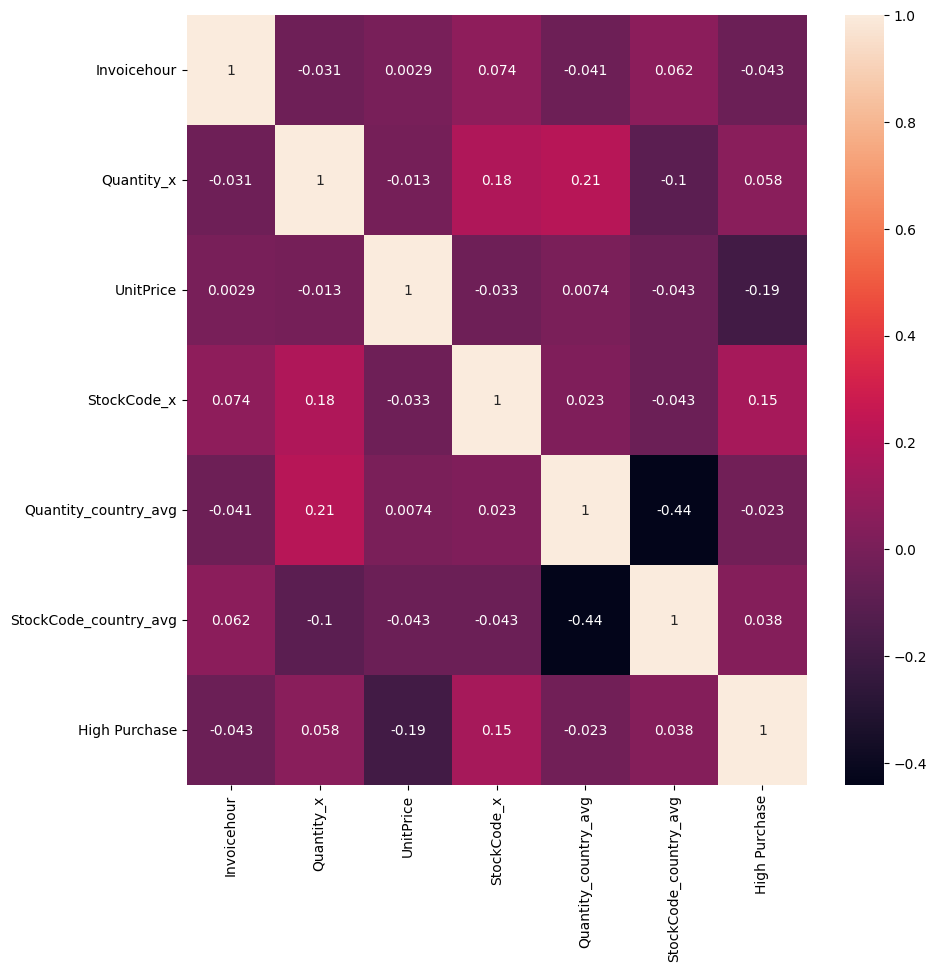

In [17]:
# plot correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True)

In [18]:
# Modelling
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, f1_score

f1 = make_scorer(f1_score)

model = xgb.XGBClassifier(objective="binary:logistic", use_label_encoder=False, eval_metric="logloss", random_sate=42, scale_pos_weight=38.27)
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(model, train_x, train_y, cv=tscv, scoring=f1)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2
)

grid_search.fit(train_x, train_y)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(train_x)
print("Best Parameters: ", grid_search.best_params_)

print("Classification Report: \n", classification_report(train_y, y_pred))
print("Confusion Matrix: \n", confusion_matrix(train_y, y_pred))

y_pred_test = best_model.predict(test_x)

print("Classification Report: \n", classification_report(test_y, y_pred_test))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_sate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_sate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_sate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_sate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:01] WARNING

Cross Validation Scores:  [0.99955693 1.         0.99933348 1.         1.        ]
Average CV Score:  0.9997780830863461
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7}
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00     13531

    accuracy                           1.00     13940
   macro avg       1.00      1.00      1.00     13940
weighted avg       1.00      1.00      1.00     13940

Confusion Matrix: 
 [[  407     2]
 [    0 13531]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        68
           1       1.00      1.00      1.00      3120

    accuracy                           1.00      3188
   macro avg       1.00      0.97      0.98      3188
weighted avg       1.00      1.00      1.0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:29:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_sate", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred_test = model.predict(test_x)

print("Classification Report: \n", classification_report(test_y, y_pred_test))
print("Confusion Matrix: \n", confusion_matrix(test_y, y_pred_test))

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer(train_x)
shap.summary_plot(shap_values, train_x)
shap.plots.force(shap_values[0])  # for the first row